In [301]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp
import pandas as pd
import seaborn as sns

In [288]:
def automateCall(NMAX=1000, samples=5, valgrind=False, op=1):
  NA = np.linspace(1,1000,samples, dtype=int)

  outputs = []
  for i in NA:
    fo = open('tempTest.in', 'w', buffering=1)
    fcontent = ""
    A = set()
    B = set()
    for j in range(i):
      A.add(np.random.randint(1,NMAX))
      B.add(np.random.randint(1,NMAX))
    
    A = set(A)
    B = set(B)
    
    na = len(A)
    nb = len(B)

    fcontent += f"{na}\n"
    fcontent += f"{nb}\n"
    
    for k in A:
      fcontent += f"{k} "

    fcontent += '\n'

    for k in B:
      fcontent += f"{k} "

    fcontent += '\n'
    # op = np.random.randint(1,5)
    fcontent += (f"{op}\n")
    if op in [1,4]: 
      fcontent += f"{np.random.randint(1,NMAX)}"
      fcontent += "\n"
    
    fo.write(fcontent)

    tempf = 'tempTest.in'
    cmdl = f"./../Src/exec < {tempf}"
    if valgrind:
      cmdl = f"valgrind ./../Src/exec < {tempf}"
    

    if valgrind: 
      a = sp.call(cmdl, shell=True)
      print(a)
    else:
      a = sp.check_output(cmdl, shell=True)
      r = a.decode('utf-8')
      r = r.strip('\n').split(',')
      outputs.append(r)
    # print(a)
  return outputs

In [324]:
outs1 = automateCall(NMAX=1000, samples=500, valgrind=False, op=1)
outs2 = automateCall(NMAX=1000, samples=500, valgrind=False, op=2)
outs3 = automateCall(NMAX=1000, samples=500, valgrind=False, op=3)
outs4 = automateCall(NMAX=1000, samples=500, valgrind=False, op=4)

In [325]:
df1 = pd.DataFrame(outs1)
columns = ['na', 'nb', 'op', 'time']
df1.columns = columns
df1 = df1.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df2 = pd.DataFrame(outs2)
df2.columns = columns
df2 = df2.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df3 = pd.DataFrame(outs3)
df3.columns = columns
df3 = df3.astype({'na':int, 'nb':int, 'op':int, 'time':float})

df4 = pd.DataFrame(outs4)
df4.columns = columns
df4 = df4.astype({'na':int, 'nb':int, 'op':int, 'time':float})


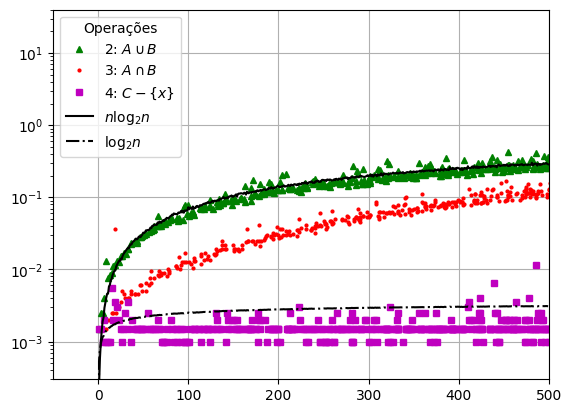

In [368]:
scaleFc = 500
# plt.plot(df1['na'], df1['time'] * scaleFc, 'bo', ms=4, label=r'1: $x \in C$')
plt.plot(df2['na'], df2['time'] * scaleFc, 'g^', ms=4, label=r'2: $A \cup B$')
plt.plot(df3['na'], df3['time'] * scaleFc, 'r.', ms=4, label=r'3: $A \cap B$')
plt.plot(df4['na'], df4['time'] * scaleFc, 'ms', ms=4, label=r'4: $C - \{x\}$')
plt.plot([i*np.log2(i)/20000 for i in df1['nb']], 'k-', label=r'$n \log _2 n$')
plt.plot([np.log2(i)/3000 for i in df1['nb']], 'k-.', label=r'$\log _2 n$')
plt.yscale('log')
plt.legend(title='Operações')
plt.xlim(-50,500)
plt.ylim(0.0003,40)
plt.grid()
plt.show()

In [160]:
outs = automateCall(NMAX=1000, samples=5, valgrind=True)

==17471== Memcheck, a memory error detector
==17471== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==17471== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==17471== Command: ./../Src/exec
==17471== 


2,2,3,0.008237
0


==17471== 
==17471== HEAP SUMMARY:
==17471==     in use at exit: 0 bytes in 0 blocks
==17471==   total heap usage: 16 allocs, 16 frees, 8,408 bytes allocated
==17471== 
==17471== All heap blocks were freed -- no leaks are possible
==17471== 
==17471== For lists of detected and suppressed errors, rerun with: -s
==17471== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==17479== Memcheck, a memory error detector
==17479== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==17479== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==17479== Command: ./../Src/exec
==17479== 


54 
26,26,3,0.019746
0


==17479== 
==17479== HEAP SUMMARY:
==17479==     in use at exit: 0 bytes in 0 blocks
==17479==   total heap usage: 114 allocs, 114 frees, 10,172 bytes allocated
==17479== 
==17479== All heap blocks were freed -- no leaks are possible
==17479== 
==17479== For lists of detected and suppressed errors, rerun with: -s
==17479== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==17482== Memcheck, a memory error detector
==17482== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==17482== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==17482== Command: ./../Src/exec
==17482== 


2 24 39 48 64 94 100 123 132 189 202 214 227 276 327 368 390 397 428 451 466 467 501 513 562 568 587 602 617 620 639 663 684 692 715 751 778 795 798 834 851 853 867 868 870 886 904 955 956 975 
50,49,4,0.024860
0


==17482== 
==17482== HEAP SUMMARY:
==17482==     in use at exit: 0 bytes in 0 blocks
==17482==   total heap usage: 205 allocs, 205 frees, 11,808 bytes allocated
==17482== 
==17482== All heap blocks were freed -- no leaks are possible
==17482== 
==17482== For lists of detected and suppressed errors, rerun with: -s
==17482== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==17484== Memcheck, a memory error detector
==17484== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==17484== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==17484== Command: ./../Src/exec
==17484== 


5 28 31 40 53 58 69 76 86 112 113 120 126 156 157 185 201 293 302 333 335 350 403 442 443 465 466 475 491 492 516 529 545 550 560 564 577 585 590 597 603 610 628 640 656 664 703 716 720 750 762 773 798 806 817 839 841 847 848 854 855 862 873 877 881 897 904 920 954 966 970 
71,73,4,0.019954
0


==17484== 
==17484== HEAP SUMMARY:
==17484==     in use at exit: 0 bytes in 0 blocks
==17484==   total heap usage: 295 allocs, 295 frees, 13,428 bytes allocated
==17484== 
==17484== All heap blocks were freed -- no leaks are possible
==17484== 
==17484== For lists of detected and suppressed errors, rerun with: -s
==17484== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
==17487== Memcheck, a memory error detector
==17487== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==17487== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==17487== Command: ./../Src/exec
==17487== 


Não Pertence.97,95,1,0.010004
0


==17487== 
==17487== HEAP SUMMARY:
==17487==     in use at exit: 0 bytes in 0 blocks
==17487==   total heap usage: 391 allocs, 391 frees, 15,156 bytes allocated
==17487== 
==17487== All heap blocks were freed -- no leaks are possible
==17487== 
==17487== For lists of detected and suppressed errors, rerun with: -s
==17487== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)


In [135]:
outs = automateCall(NMAX=1000, samples=5, valgrind=False)

b'0,0,0,0.000002\n'
b'0,0,0,0.000002\n'
b'0,0,0,0.000001\n'
b'0,0,0,0.000001\n'
b'0,0,0,0.000001\n'


In [133]:
outs.decode('ascii')

'0,0,0,0.000001\n'